# PRE-PROCESSING

In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
pd.set_option('float_format', '{:.2f}'.format)

In [358]:
def plot_confusion_matrix(y_true, y_pred, classes, cms_bool = False,cms=None,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        title = 'Confusion matrix, without normalization'
    
    if cms_bool:
        cm = cms
    else:
        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)
    print(type(cm))
    print(cm)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [359]:
data_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('sample_submission.csv')
y_test = y_test.drop(columns=['Id'])
data_test = pd.concat([X_test,y_test],axis=1)
data = pd.concat([data_train,data_test],ignore_index=True)
data = data.drop(columns=["Id"])
data_test.shape

(1459, 81)

In [360]:
#data[data.index == 0]

## GET NUMERICAL COLUMNS

In [361]:
mask = data.dtypes == np.object
categorical_cols = list(data.columns[mask])
numerical_cols = list(data.select_dtypes(include=['int64','float64']).columns)
#len(categorical_cols)
#numerical_cols

# Encode Categorical Data

In [362]:
categorical_to_ordinal_encoding = {
                        #"Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "CentralAir":{"N" : 0, "Y": 1},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       #"Fence" : {"No" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish" : {"NA" : 0,"Unf" : 1,"RFn" : 2,"Fin" : 3},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       #"PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 0, "Pave" : 1},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
data = data.replace(categorical_to_ordinal_encoding)

In [363]:
data = pd.get_dummies(data,
               prefix=['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood','Condition1',
       'Condition2', 'BldgType', 'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation','Heating', 'Electrical','GarageType','SaleType','SaleCondition'], 
               columns=['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood','Condition1',
       'Condition2', 'BldgType', 'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation','Heating', 'Electrical','GarageType','SaleType','SaleCondition'])


# Make a boxplot relating categorical cols and saleprice in order to see which are more correlated

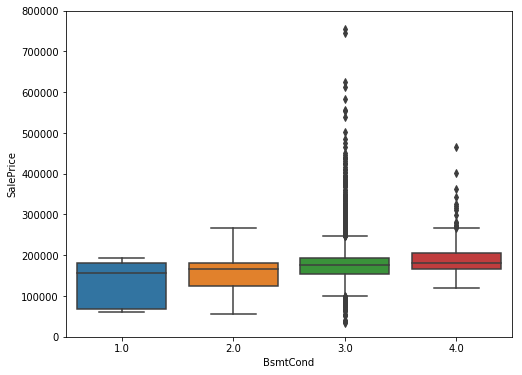

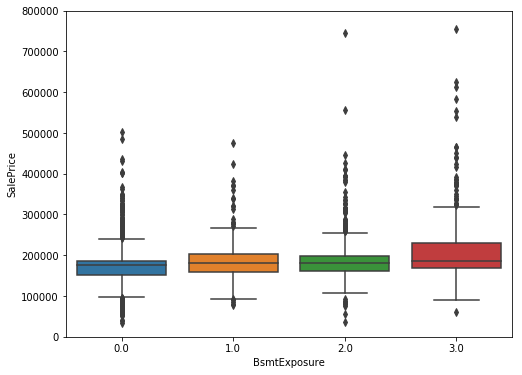

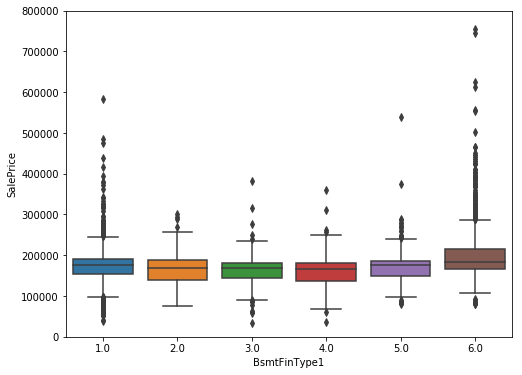

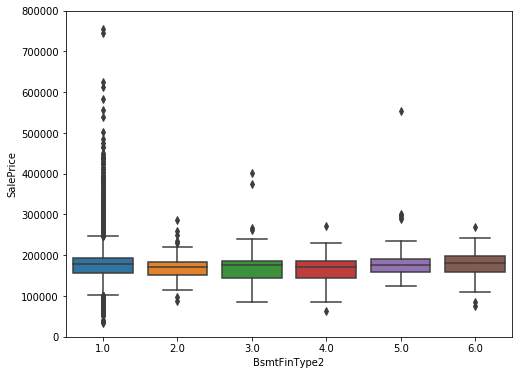

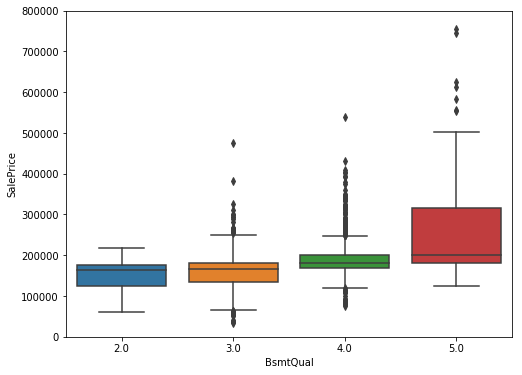

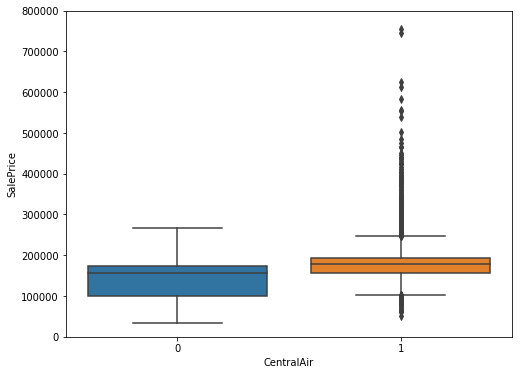

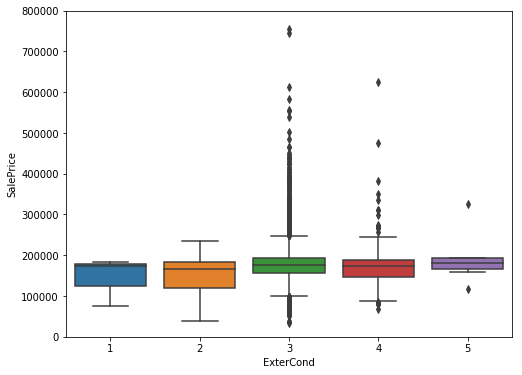

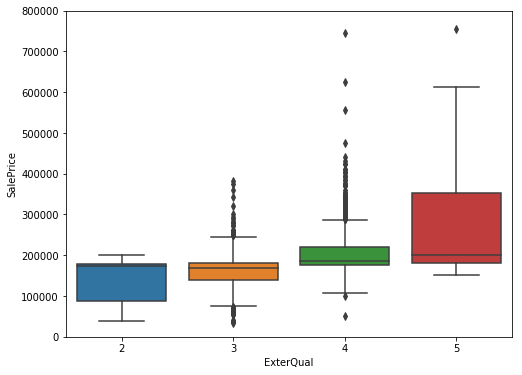

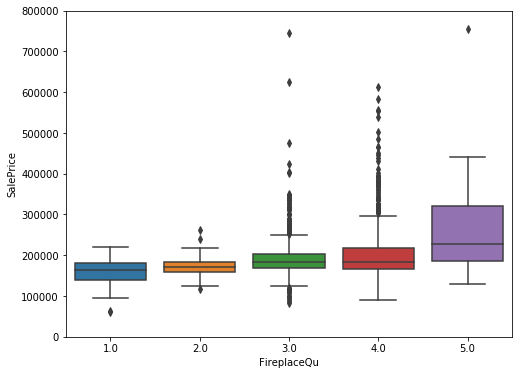

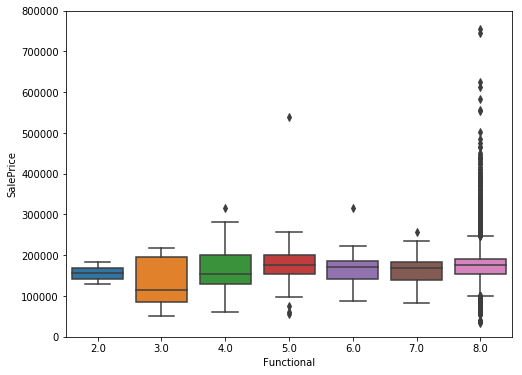

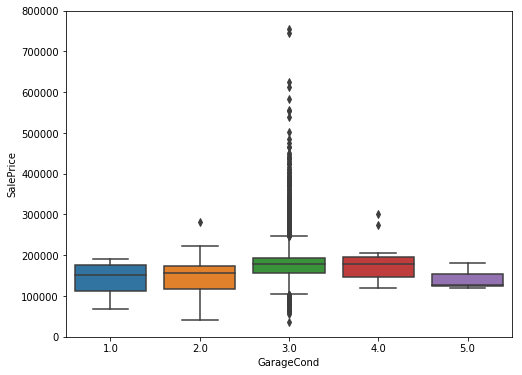

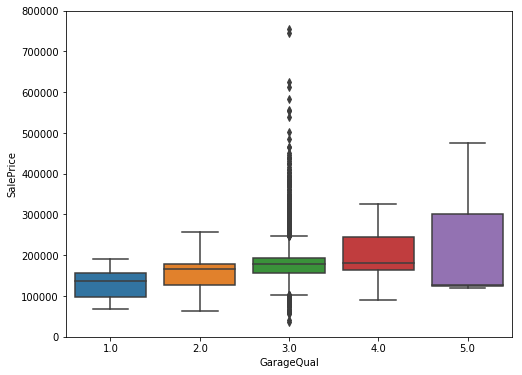

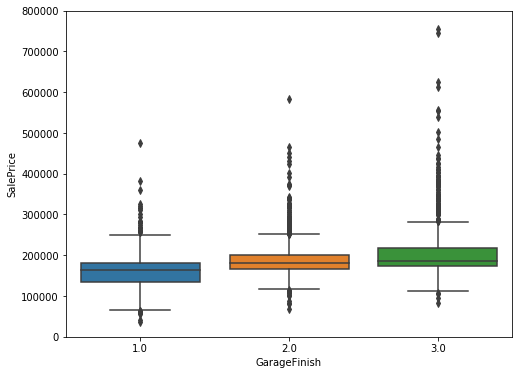

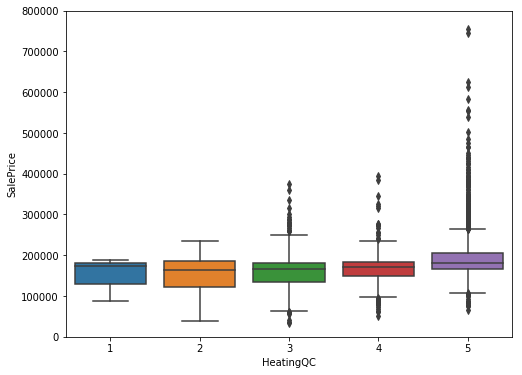

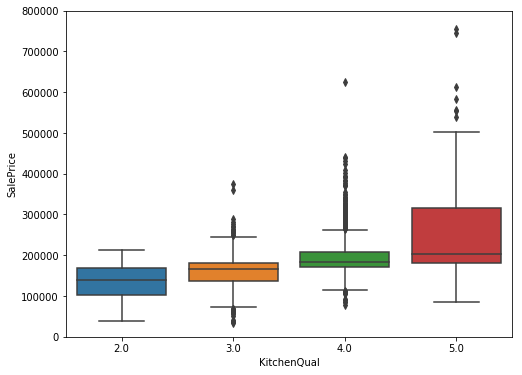

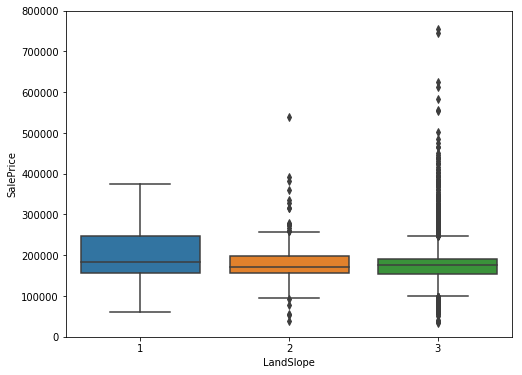

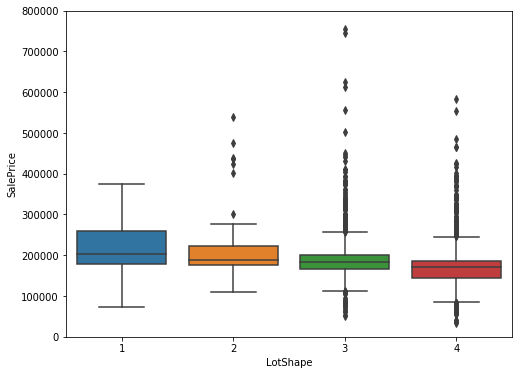

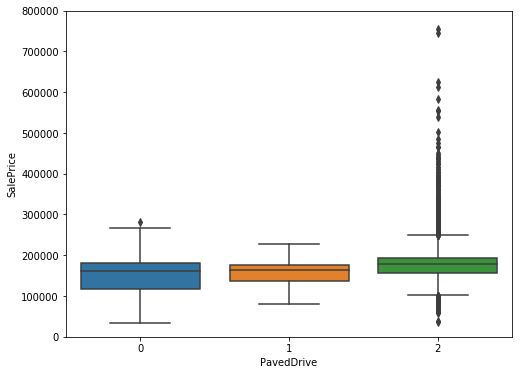

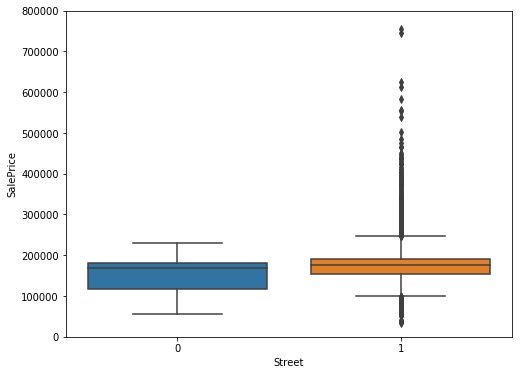

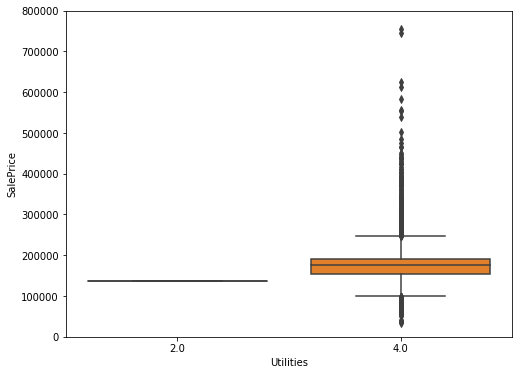

In [364]:
for var in categorical_to_ordinal_encoding:
    dt = pd.concat([data['SalePrice'], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=dt)
    fig.axis(ymin=0, ymax=800000);
#categorical_relevant_features = ['BsmtCond','BsmtExposure','BsmtQual','CentralAir','ExterQual','FireplaceQu', 'GarageQual','GarageFinish','HeatingQC','KitchenQual','PavedDrive','Street']


In [365]:
"""
#x_data tem que ser os dados projetados num espaço 2D e y_data é a classificação do respectivo dado
def plotClassification(x_data,y_data,img_name):
    caras = np.array([0]*x_data.shape[1])
    medias = np.array([0]*x_data.shape[1])
    baratas = np.array([0]*x_data.shape[1])
    i = 0
    for classe in y_data:
        if classe == 'barata':
            baratas = np.vstack((baratas,x_data[i]))
        elif classe == 'media':
            medias = np.vstack((medias,x_data[i]))
        elif classe == 'cara':
            caras = np.vstack((caras,x_data[i]))
        i += 1
    baratas = np.delete(baratas,0,0)
    medias = np.delete(medias,0,0)
    caras = np.delete(caras,0,0)
    dt = (baratas, medias, caras)
    colors = ("red", "green", "blue")
    groups = ("barata", "media", "cara")
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    #print(dt[0])
    for i in range(len(dt)):
        try:
            x_coordinates = dt[i][:,0]
            y_coordinates = dt[i][:,1]
        except:
            pass
        else:
            ax.scatter(x_coordinates, y_coordinates, alpha=0.8, c=colors[i], edgecolors='none', s=30, label=groups[i])
    plt.legend(loc=2)
    plt.savefig(img_name)
    plt.show()
"""

'\n#x_data tem que ser os dados projetados num espaço 2D e y_data é a classificação do respectivo dado\ndef plotClassification(x_data,y_data,img_name):\n    caras = np.array([0]*x_data.shape[1])\n    medias = np.array([0]*x_data.shape[1])\n    baratas = np.array([0]*x_data.shape[1])\n    i = 0\n    for classe in y_data:\n        if classe == \'barata\':\n            baratas = np.vstack((baratas,x_data[i]))\n        elif classe == \'media\':\n            medias = np.vstack((medias,x_data[i]))\n        elif classe == \'cara\':\n            caras = np.vstack((caras,x_data[i]))\n        i += 1\n    baratas = np.delete(baratas,0,0)\n    medias = np.delete(medias,0,0)\n    caras = np.delete(caras,0,0)\n    dt = (baratas, medias, caras)\n    colors = ("red", "green", "blue")\n    groups = ("barata", "media", "cara")\n    fig = plt.figure()\n    ax = fig.add_subplot(1, 1, 1)\n    #print(dt[0])\n    for i in range(len(dt)):\n        try:\n            x_coordinates = dt[i][:,0]\n            y_co

In [366]:
"""for i in categorical_cols:
    data = data.drop(i, axis=1)
data = data.drop(columns=["MoSold"])
numerical_cols.remove('MoSold')"""
data = data[numerical_cols]
data = data.drop(columns=["MoSold"])
numerical_cols.remove('MoSold')

## NUMBER OF MISSING DATA PER COLUMN

In [367]:
#data = data.sample(frac=1, random_state=0).reset_index(drop=True)

In [368]:
data.SalePrice.describe()

count     2919.00
mean    180052.85
std      57381.57
min      34900.00
25%     154795.08
50%     176734.84
75%     191895.74
max     755000.00
Name: SalePrice, dtype: float64

In [369]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,60,65.00,8450,7,5,2003,2003,196.00,706.00,0.00,...,548.00,0,61,0,0,0,0,0,2008,208500.00
1,20,80.00,9600,6,8,1976,1976,0.00,978.00,0.00,...,460.00,298,0,0,0,0,0,0,2007,181500.00
2,60,68.00,11250,7,5,2001,2002,162.00,486.00,0.00,...,608.00,0,42,0,0,0,0,0,2008,223500.00
3,70,60.00,9550,7,5,1915,1970,0.00,216.00,0.00,...,642.00,0,35,272,0,0,0,0,2006,140000.00
4,60,84.00,14260,8,5,2000,2000,350.00,655.00,0.00,...,836.00,192,84,0,0,0,0,0,2008,250000.00
5,50,85.00,14115,5,5,1993,1995,0.00,732.00,0.00,...,480.00,40,30,0,320,0,0,700,2009,143000.00
6,20,75.00,10084,8,5,2004,2005,186.00,1369.00,0.00,...,636.00,255,57,0,0,0,0,0,2007,307000.00
7,60,nan,10382,7,6,1973,1973,240.00,859.00,32.00,...,484.00,235,204,228,0,0,0,350,2009,200000.00
8,50,51.00,6120,7,5,1931,1950,0.00,0.00,0.00,...,468.00,90,0,205,0,0,0,0,2008,129900.00
9,190,50.00,7420,5,6,1939,1950,0.00,851.00,0.00,...,205.00,0,4,0,0,0,0,0,2008,118000.00


In [370]:
missingValues = data.isna().sum()
#mask = data.value > 0
col = []
qnt = []
perc = []
total = data.shape[0]
for items in missingValues.iteritems():
    #print(items)
    if items[1] > 0:
        #print(items)
        col.append(items[0])
        qnt.append(items[1])
        perc.append((items[1]/total)*100)
#print("FIM")

#for index, row in missingValues.iterrows():
#    print(row[index])

In [371]:
new_df = pd.DataFrame({"":col,"Missing Ratio":perc,"Missing Number":qnt})
new_df

,,Missing Ratio,Missing Number
0,LotFrontage,16.65,486
1,MasVnrArea,0.79,23
2,BsmtFinSF1,0.03,1
3,BsmtFinSF2,0.03,1
4,BsmtUnfSF,0.03,1
5,TotalBsmtSF,0.03,1
6,BsmtFullBath,0.07,2
7,BsmtHalfBath,0.07,2
8,GarageYrBlt,5.45,159
9,GarageCars,0.03,1


## FILL MISSING DATA, DROP SOME COLUMNS AND DATA

In [372]:
data = data[(data.MasVnrArea.notna())]
data = data[(data.BsmtFinSF1.notna())]
data = data[(data.BsmtFinSF2.notna())]
data = data[(data.BsmtUnfSF.notna())]
data = data[(data.TotalBsmtSF.notna())]
data = data[(data.BsmtFullBath.notna())]
data = data[(data.BsmtHalfBath.notna())]
data = data[(data.GarageCars.notna())]
data = data[(data.GarageArea.notna())]
data = data.drop(columns=["GarageYrBlt","LotFrontage"])

In [373]:
#numerical_cols
numerical_cols.remove('GarageYrBlt')
numerical_cols.remove('LotFrontage')

In [374]:
numerical_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [375]:
missingValues = data.isna().sum()
#mask = data.value > 0
for items in missingValues.iteritems():
    if items[1] > 0:
        print(items) 

In [376]:
#data.describe()

In [377]:
data[numerical_cols[0:10]].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
count,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00
mean,57.23,10150.74,6.08,5.57,1971.09,1984.11,102.31,441.37,49.91,559.77
std,42.61,7876.96,1.41,1.12,30.27,20.89,179.40,455.28,169.81,439.11
min,20.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00
25%,20.00,7449.00,5.00,5.00,1953.00,1965.00,0.00,0.00,0.00,220.00
50%,50.00,9452.00,6.00,5.00,1973.00,1993.00,0.00,368.00,0.00,467.00
75%,70.00,11553.00,7.00,6.00,2000.00,2004.00,164.00,733.00,0.00,801.00
max,190.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1526.00,2336.00


In [378]:
data[numerical_cols[10:20]].describe()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
count,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00
mean,1051.05,1158.21,335.83,4.74,1498.78,0.43,0.06,1.56,0.38,2.86
std,440.45,388.87,428.42,46.60,505.11,0.52,0.25,0.55,0.50,0.82
min,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00
25%,792.00,876.00,0.00,0.00,1124.00,0.00,0.00,1.00,0.00,2.00
50%,989.00,1082.00,0.00,0.00,1442.00,0.00,0.00,2.00,0.00,3.00
75%,1300.00,1383.00,703.00,0.00,1742.00,1.00,0.00,2.00,1.00,3.00
max,6110.00,5095.00,2065.00,1064.00,5642.00,3.00,2.00,4.00,2.00,8.00


In [379]:
data[numerical_cols[20:30]].describe()

,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
count,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00,2893.00
mean,1.04,6.45,0.60,1.76,472.34,93.97,47.10,23.09,2.63,16.21
std,0.21,1.57,0.65,0.76,215.60,126.79,67.13,64.24,25.30,56.42
min,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,5.00,0.00,1.00,319.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,6.00,1.00,2.00,478.00,0.00,26.00,0.00,0.00,0.00
75%,1.00,7.00,1.00,2.00,576.00,168.00,69.00,0.00,0.00,0.00
max,3.00,15.00,4.00,5.00,1488.00,1424.00,742.00,1012.00,508.00,576.00


In [380]:
data[numerical_cols[30:]].describe()

,PoolArea,MiscVal,YrSold,SalePrice
count,2893.00,2893.00,2893.00,2893.00
mean,2.27,51.28,2007.79,179862.69
std,35.82,569.93,1.32,57338.05
min,0.00,0.00,2006.00,34900.00
25%,0.00,0.00,2007.00,154300.00
50%,0.00,0.00,2008.00,176515.50
75%,0.00,0.00,2009.00,191745.39
max,800.00,17000.00,2010.00,755000.00


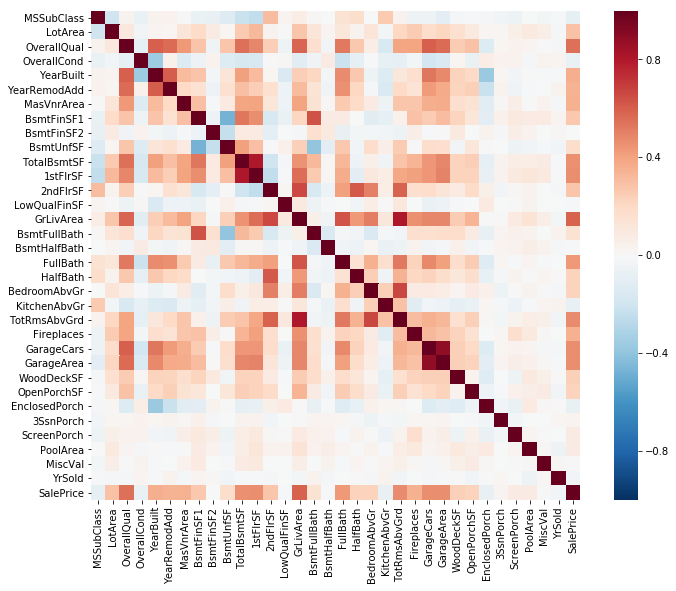

In [381]:
# Correlation Matrix Heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cmap=sns.color_palette("RdBu_r", 1000), vmin=-1,vmax=1, square=True);

/home/felipe/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


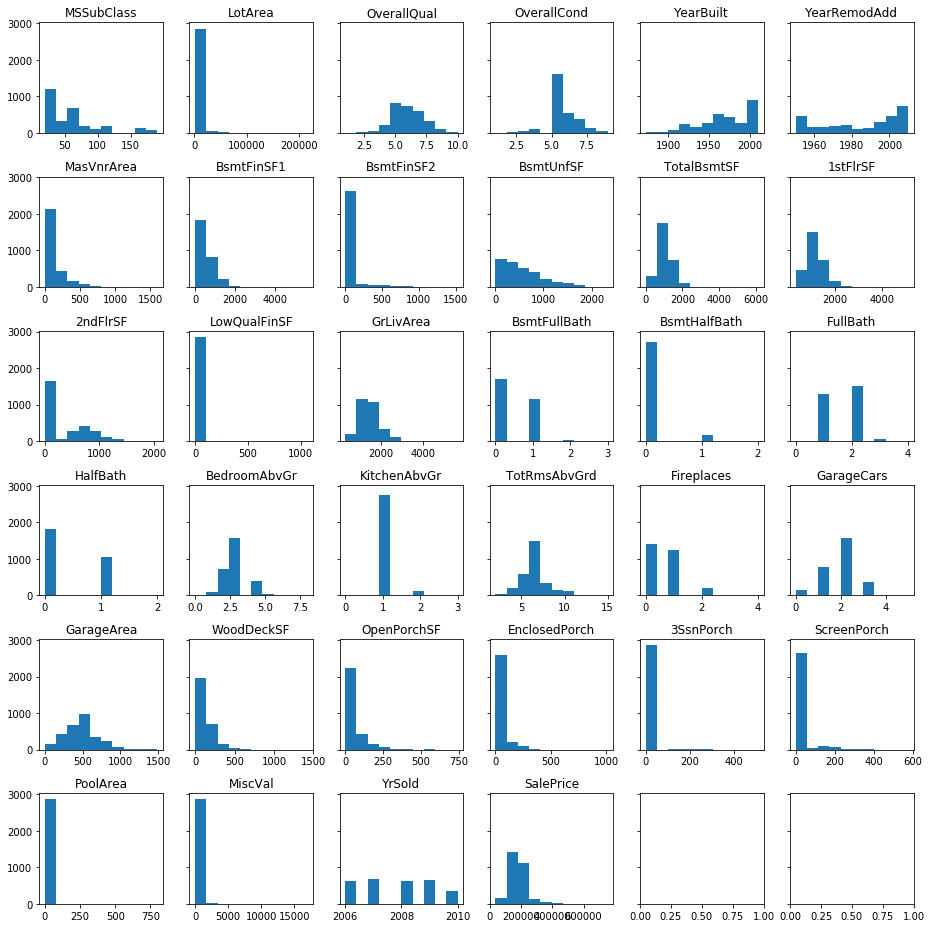

In [382]:
position = 0
col_list = list(data.columns.values.tolist())
fig,ax = plt.subplots(6,6,sharey=True, tight_layout=True,figsize=(13,13))
for i in range(6):
    for j in range(6):
        if i == 5 and j == 4:
            break
        ax[i,j].hist(data[col_list[position]])
        ax[i,j].title.set_text(col_list[position])
        position+=1
        
plt.show()

## Check variables skewness (Assimetria)

In [383]:
skewed_feats = data[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness

,Skewed Features
MiscVal,21.85
PoolArea,16.82
LotArea,12.95
LowQualFinSF,12.03
3SsnPorch,11.32
KitchenAbvGr,4.30
BsmtFinSF2,4.13
EnclosedPorch,4.02
ScreenPorch,3.93
BsmtHalfBath,3.91


## Normalize all skewed variables

In [384]:
from scipy.stats import boxcox
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features".format(skewness.shape[0]))
skewed_features = skewness.index
for feat in skewed_features:
    if any(x<=0 for x in data[feat]):
        for i in data.index:
            data.loc[i,feat] += (1 + data[feat].min())
    data[feat] = np.log(data[feat])
    #data[feat], lam = boxcox(data[feat])
    #print('Lambda: ',lam)
    data[feat] = (data[feat] - data[feat].mean())/data[feat].std(ddof=0)

There are 34 skewed numerical features


In [385]:
y = 'SalePrice'
data = data.sort_values(by='SalePrice')
feature_cols = [x for x in data.columns if x != y]
X_data_train = data[feature_cols]
y_data_train = data[y]

In [386]:
X_data_train.shape,y_data_train.shape

((2893, 33), (2893,))

/home/felipe/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


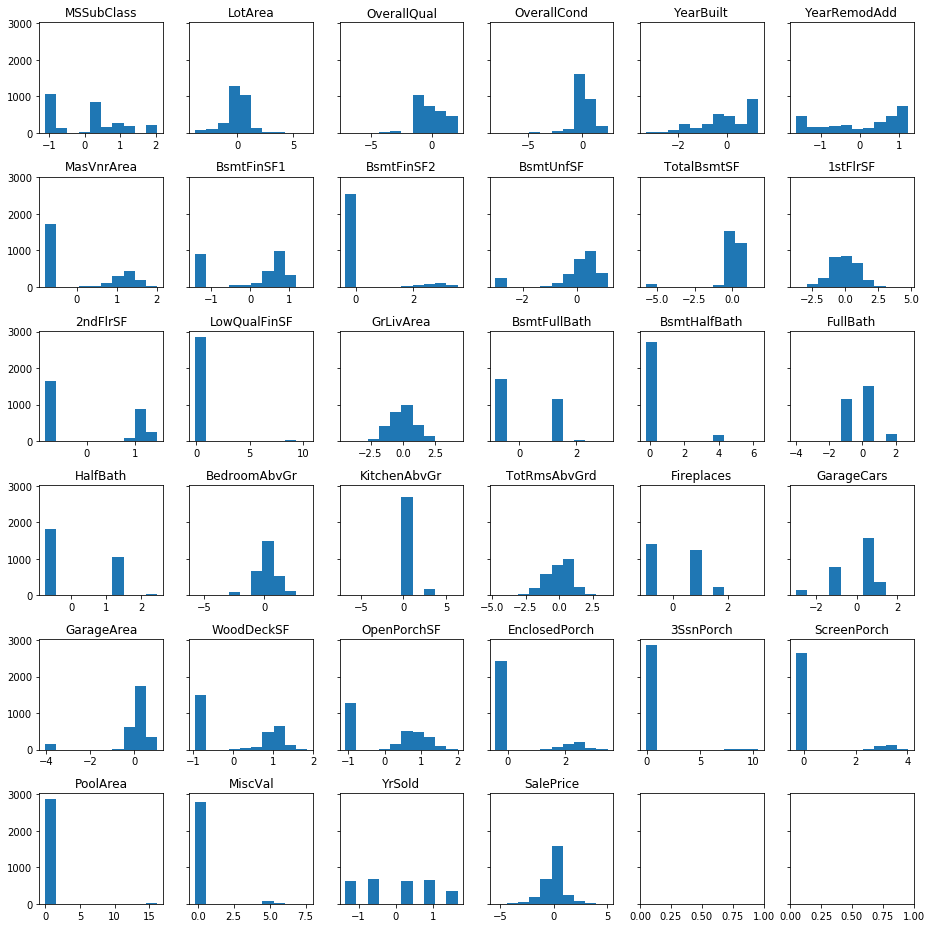

In [387]:
position = 0
col_list = list(data.columns.values.tolist())
fig,ax = plt.subplots(6,6,sharey=True, tight_layout=True,figsize=(13,13))
for i in range(6):
    for j in range(6):
        if i == 5 and j == 4:
            break
        ax[i,j].hist(data[col_list[position]])
        ax[i,j].title.set_text(col_list[position])
        position+=1

plt.show()

In [388]:
y_data_train = data['SalePrice']
X_data_train = data[feature_cols]

## Plot distance matrix in order to see outliers

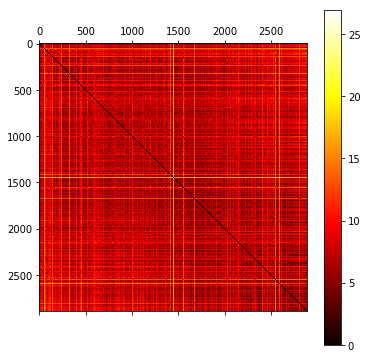

In [389]:
from sklearn.metrics.pairwise import euclidean_distances
from operator import itemgetter
distances = euclidean_distances(X_data_train,X_data_train)
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
X_data_train["mean_dist"] = m
m_sorted = sorted(m)
plt.rcParams['figure.figsize'] = [6, 6]
plt.matshow(distances,cmap="hot")
cb = plt.colorbar()
im = plt.imshow(distances, cmap='hot', interpolation='nearest')
#values = np.unique(distances.ravel())
#colors = [im.cmap(im.norm(value)) for value in values]
plt.savefig('Heatmap4.png')
plt.show()
plt.close()

In [390]:
np.max(distances)

26.9419589902304

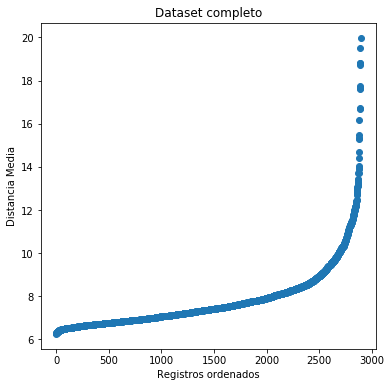

In [391]:
plt.scatter(np.arange(0,len(m)),m_sorted)
plt.xlabel("Registros ordenados")
plt.ylabel("Distancia Media")
plt.title("Dataset completo")
plt.savefig('whole_dataset.png')

Text(0.5, 1.0, 'Dataset completo-outliers zoom')

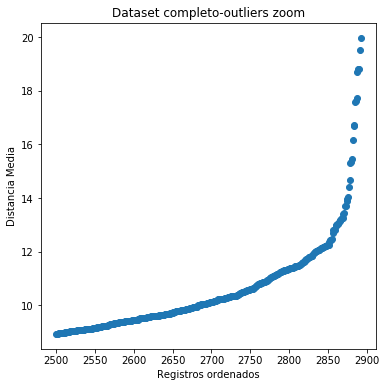

In [392]:
plt.scatter(np.arange(2500,len(m)),m_sorted[2500:])
plt.xlabel("Registros ordenados")
plt.ylabel("Distancia Media")
plt.title("Dataset completo-outliers zoom")

In [393]:
outliers = m_sorted[-round(0.1*len(m)):-1]
"""
outliers_index = list()
for i in outliers:
    for j in range(len(m)):
        if m[j] == i:
            outliers_index.append(j)
X_data_train = X_data_train.drop(X_data_train.index[outliers_index])
y_data_train = y_data_train.drop(y_data_train.index[outliers_index])
"""
X_data_train['SalePrice'] = y_data_train
X_data_train = X_data_train[X_data_train.mean_dist < outliers[0]]
y_data_train = X_data_train['SalePrice']
X_data_train = X_data_train[feature_cols]



## Drop 10% of highest avg distance, in order to remove outliers

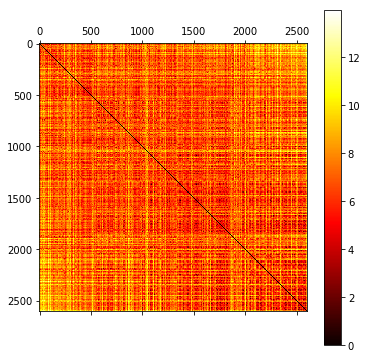

In [394]:

distances = euclidean_distances(X_data_train,X_data_train)
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
m_sorted = sorted(m)
plt.rcParams['figure.figsize'] = [6, 6]
plt.matshow(distances,cmap="hot")
cb = plt.colorbar()
plt.imshow(distances, cmap='hot', interpolation='nearest')
plt.savefig('Heatmap5.png')
plt.show()
plt.close()

In [395]:
np.max(distances)

13.961755659255013

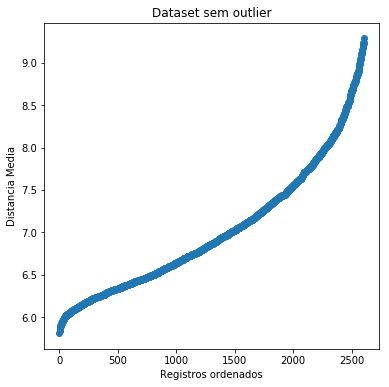

In [396]:
plt.scatter(np.arange(0,len(m)),m_sorted)
plt.xlabel("Registros ordenados")
plt.ylabel("Distancia Media")
plt.title("Dataset sem outlier")
plt.savefig('dataset_sem_outlier.png')

In [397]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=0.9, svd_solver = 'full')
pca.fit(scale(X_data_train))
X_PCA_train = pca.transform(scale(X_data_train))

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


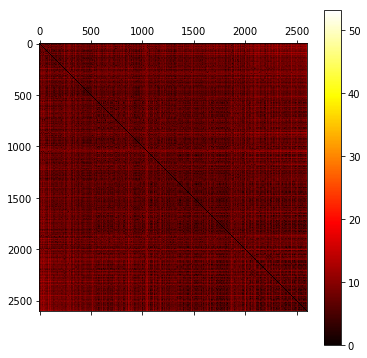

In [398]:
distances = euclidean_distances(X_PCA_train,X_PCA_train)
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
m_sorted = sorted(m)
plt.rcParams['figure.figsize'] = [6, 6]
plt.matshow(distances,cmap="hot")
cb = plt.colorbar()
plt.imshow(distances, cmap='hot', interpolation='nearest')
plt.savefig('Heatmap6.png')
plt.show()
plt.close()

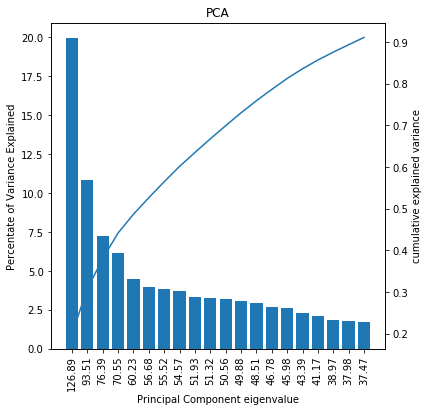

In [399]:
plt.figure()
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
result = pca.explained_variance_ratio_
plt.bar(x= sorted(np.arange(len(result)),reverse=True), height=sorted(percent_variance,reverse=True),tick_label=np.round(sorted(pca.singular_values_,reverse=True),decimals=2) )
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component eigenvalue')
plt.xticks(rotation=90)
plt.title('PCA')
ax = plt.gca()
# set the xlimits to be the reverse of the current xlimits
ax.set_xlim(ax.get_xlim()[::-1])
# call `draw` to re-render the graph
plt.draw()

axes2 = plt.twinx()
axes2.plot(np.arange(len(result)),sorted(np.cumsum(result),reverse=True ))
axes2.set_ylabel('cumulative explained variance')
plt.savefig('PCA.png')
plt.show()

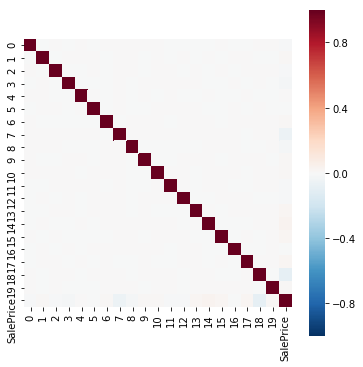

In [400]:
PCA_data_train = pd.DataFrame(X_PCA_train)
PCA_data_train['SalePrice'] = y_data_train
corrmat = PCA_data_train.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat,cmap=sns.color_palette("RdBu_r", 1000), vmin=-1,vmax=1, square=True);
plt.savefig('correlatio_matrix_pos_ACP.png')

In [401]:
from sklearn.cluster import KMeans
from sklearn import metrics
silhouette_values = dict()
for i in range(2, 11):
    silhouette_values[i] = list()
    for j in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=1, random_state=j)
        silhouette_values[i].append( metrics.silhouette_score(X_data_train, kmeans.fit_predict(X_data_train) ) )

Text(0, 0.5, 'Silhouette Score')

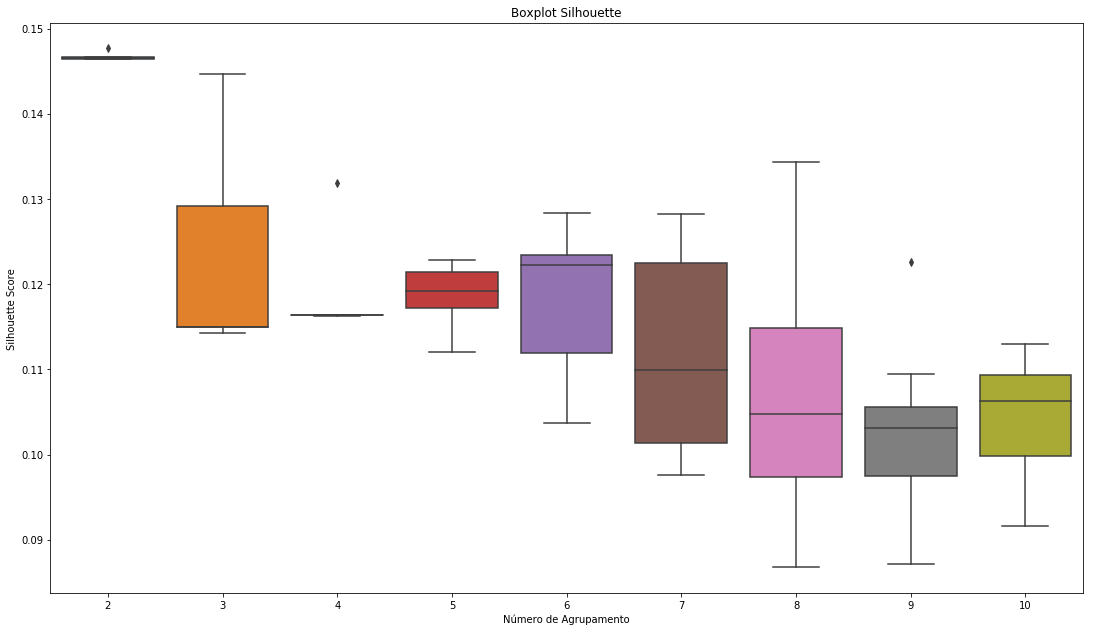

In [402]:
import seaborn as sns
df = pd.DataFrame(silhouette_values)
f, ax = plt.subplots(figsize=(18.5, 10.5))
fig = sns.boxplot(data=df)
fig.set_xticklabels(ax.get_xticklabels())
title = 'Boxplot Silhouette'
ax.set_title(title)
ax.set_xlabel('Número de Agrupamento')
ax.set_ylabel('Silhouette Score')

# IN THIS SECTION, WE WILL CONVERT REGRESSION PROBLEM TO CLASSIFICATION

In [403]:
lim1 = np.percentile(y_data_train,50)
lim1

0.09268248365360002

In [404]:
y_classes_train = list()
for value1 in y_data_train:
    if value1 <= lim1:
        y_classes_train.append('barata')
    else:
        y_classes_train.append('cara')

len(y_classes_train)

2604

In [405]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_classes_train)
y_label_encoded_train = le.transform(y_classes_train)

In [406]:
X_data_train = pd.DataFrame(X_data_train)
X_data_train['Y'] = y_label_encoded_train
X_data_train = X_data_train.reset_index(drop=True)
y_label_encoded_train = X_data_train['Y']
X_data_train = X_data_train[feature_cols]

In [407]:
le.transform(['barata','cara'])

array([0, 1])

In [408]:
class_df_train = pd.DataFrame({"classes_train":y_label_encoded_train})
#class_df.hist()

#### Histograma Train

In [409]:
values = class_df_train["classes_train"].value_counts(sort=True)
val_lista=[values[0],values[1]]
val_lista

[1302, 1302]

<BarContainer object of 2 artists>

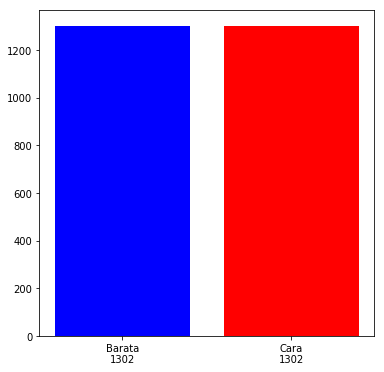

In [410]:
plt.bar(["Barata\n"+str(val_lista[0]),"Cara\n"+str(val_lista[1])], val_lista, color=["blue","red"], align='center')

In [411]:
le.transform(['barata', 'cara'])

array([0, 1])

### Cross Validation 

In [412]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'roc_auc':  make_scorer(roc_auc_score),
          'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

In [413]:
resultado_metricas = {"treino":pd.DataFrame({"Name":['acuracia','precisão','recall','f1_score','roc_auc','tp','tn','fp','fn']})} #'tp','tn','fp','fn'
scores_geral = {}

In [414]:
def armazena_resultado(nome_modelo,scores):
    media = {'acuracia':np.mean(scores['test_accuracy']),'precisão':np.mean(scores['test_precision'])
             ,'recall':np.mean(scores['test_recall']),'f1_score':np.mean(scores['test_f1_score'])
             ,'roc_auc':np.mean(scores['test_roc_auc']),
            'tp':np.sum(scores['test_tp']),'tn':np.sum(scores['test_tn']),'fp':np.sum(scores['test_fp']),'fn':np.sum(scores['test_fn'])}
    var = {'acuracia':np.var(scores['test_accuracy']),'precisão':np.var(scores['test_precision'])
             ,'recall':np.var(scores['test_recall']),'f1_score':np.var(scores['test_f1_score'])
             ,'roc_auc':np.var(scores['test_roc_auc']),
                              'tp':-1,'tn':-1,'fp':-1,'fn':-1}
    resultado_metricas["treino"][nome_modelo] = [ v for v in media.values() ]
    resultado_metricas["treino"][nome_modelo+" Var"] = [ v for v in var.values() ]
    return media,var

In [415]:
type(X_data_train)

pandas.core.frame.DataFrame

## FIRST MODEL: LOGISTIC REGRESSION

###### DATASET DE TREINO

In [416]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
nome_modelo = "Logistic Regression"
"""
parameters = {'solver':['lbfgs'],'C': [0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(LogisticRegression(), parameters, n_jobs=-1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19))
clf.fit(X_data_train, y_label_encoded_train)
#print(clf)
print(clf.score(X_data_train, y_label_encoded_train))
print(clf.best_params_)
"""
LR = LogisticRegression(solver='lbfgs',C=0.01)
scores = cross_validate(LR, X_data_train, y_label_encoded_train,cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19), scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media


{'acuracia': 0.784172049324721,
 'precisão': 0.7860773565984177,
 'recall': 0.7818144450968878,
 'f1_score': 0.7834342568181454,
 'roc_auc': 0.784172049324721,
 'tp': 1018,
 'tn': 1024,
 'fp': 278,
 'fn': 284}

<class 'numpy.ndarray'>
[[1024  278]
 [ 284 1018]]


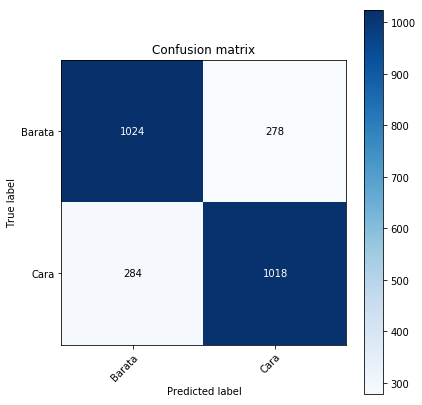

In [417]:
plot_confusion_matrix(None,None,classes=['Barata', 'Cara'],cms_bool = True,cms = np.array([[media['tn'], media['fp']],[media['fn'] ,media['tp']]]), title='Confusion matrix')

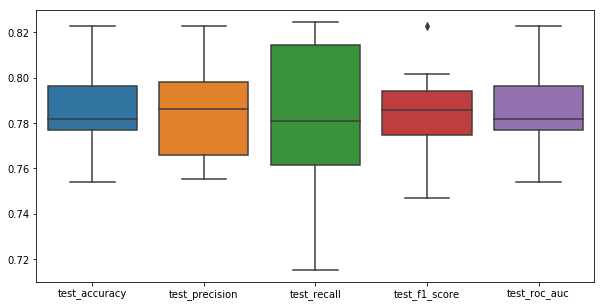

In [418]:
df_score = pd.DataFrame(scores)
df_score = df_score.drop(columns=["fit_time","score_time","test_tp","test_tn","test_fp","test_fn"])
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(data=df_score)

## SECOND MODEL: NAIVE BAYES

###### DATASET DE TREINO

In [419]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nome_modelo = "Naive Bayes"
gnb = GaussianNB()
scores = cross_validate(gnb, X_data_train, y_label_encoded_train,cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19), scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#scores
media,var = armazena_resultado(nome_modelo,scores)
media


{'acuracia': 0.6754550792718732,
 'precisão': 0.6165594677416284,
 'recall': 0.9471051086318262,
 'f1_score': 0.7450066771682184,
 'roc_auc': 0.6754550792718732,
 'tp': 1233,
 'tn': 526,
 'fp': 776,
 'fn': 69}

<class 'numpy.ndarray'>
[[ 526  776]
 [  69 1233]]


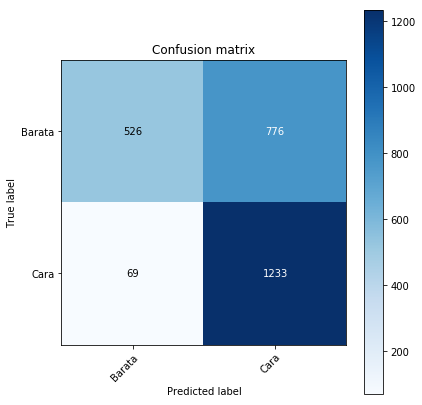

In [420]:
plot_confusion_matrix(None,None,classes=['Barata', 'Cara'],cms_bool = True,cms = np.array([[media['tn'], media['fp']],[media['fn'] ,media['tp']]]), title='Confusion matrix')

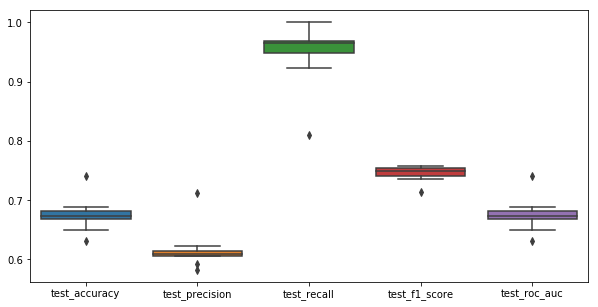

In [421]:
df_score = pd.DataFrame(scores)
df_score = df_score.drop(columns=["fit_time","score_time","test_tp","test_tn","test_fp","test_fn"])
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(data=df_score)

## Random Forest

###### DATASET DE TREINO

In [422]:
from sklearn.ensemble import RandomForestClassifier
nome_modelo = "Random Forest"
"""
parameters = {'random_state':[0],'n_estimators':[k for k in range(1,100)]}
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19))
clf.fit(X_data_train, y_label_encoded_train)
#print(clf)
print(clf.score(X_data_train, y_label_encoded_train))
print(clf.best_params_)"""

rfc = RandomForestClassifier(n_estimators=34, random_state=0)
scores = cross_validate(rfc, X_data_train, y_label_encoded_train,cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19), scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#scores
media,var = armazena_resultado(nome_modelo,scores)
media



{'acuracia': 0.7907105108631826,
 'precisão': 0.8061032910234838,
 'recall': 0.766476805637111,
 'f1_score': 0.7854266842154304,
 'roc_auc': 0.7907105108631826,
 'tp': 998,
 'tn': 1061,
 'fp': 241,
 'fn': 304}

<class 'numpy.ndarray'>
[[1061  241]
 [ 304  998]]


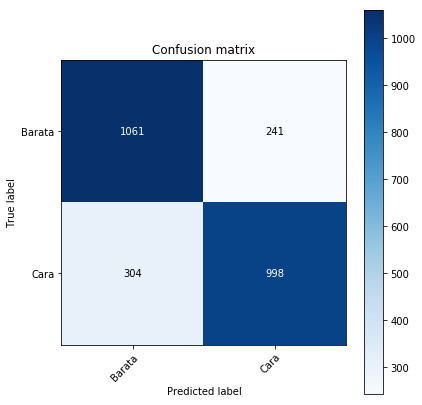

In [423]:
plot_confusion_matrix(None,None,classes=['Barata', 'Cara'],cms_bool = True,cms = np.array([[media['tn'], media['fp']],[media['fn'] ,media['tp']]]), title='Confusion matrix')

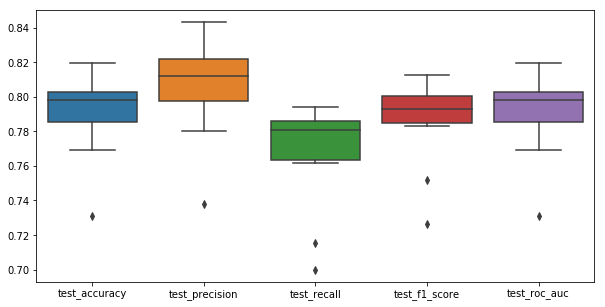

In [424]:
df_score = pd.DataFrame(scores)
df_score = df_score.drop(columns=["fit_time","score_time","test_tp","test_tn","test_fp","test_fn"])
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(data=df_score)

## RBF

###### DATASET DE TREINO¶

In [425]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import KMeans
from cvxopt import matrix, solvers
def _kernel_function(center, sigma, data_point):
    return np.exp(-1*(np.linalg.norm(np.subtract(center,data_point))**2 )/ (2 * sigma**2) )

class RBFN(BaseEstimator,ClassifierMixin):
    def __init__(self, hidden_shape, sigma = None, centers=None, weights=None, mode = 'classifier'):
        """ radial basis function network
        # Arguments
            input_shape: dimension of the input data
            e.g. scalar functions have should have input_dimension = 1
            hidden_shape: number of hidden radial basis functions,
            also, number of centers.
        """
        self.hidden_shape = hidden_shape
        self.sigma = sigma
        self.centers = centers
        self.weights = weights
        self.mode = mode
        
    def getIndicatorVariables(self,class_vector):
        numpy_class_vector = np.asarray(class_vector)
        classes_identified = np.unique(numpy_class_vector)
        output_dict = dict()
        for cur_class in classes_identified:
            output_dict[cur_class] = list()
        for element in class_vector:
            for key in output_dict.keys():
                output_dict[key].append(-1)
            #substitui o valor do último elemento da lista (-1) por 1 pois é a classe correspondente
            output_dict[element][-1] = 1
        return pd.DataFrame(output_dict)
    
    def getClassFromIndicatorVariables(self,indicator_variables):
        classes = list()
        for row in range(0,len(indicator_variables)): 
            for column in indicator_variables.columns:
                if indicator_variables.iloc[row][column] == 1:
                    classes.append(column)
        return classes       
        
    def getRBF_Centers_And_Std(self,X_data_train):    
        num_clusters = self.hidden_shape
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=1, random_state=0)
        kmeans.fit(X_data_train)
        centers = kmeans.cluster_centers_
        distances = euclidean_distances(centers,centers)
        stds = list()
        for j in range(0,num_clusters):
            distance_to_other_centers = np.delete(distances[j],j)
            stds.append(distance_to_other_centers[np.argmin(distance_to_other_centers)])
        return centers,stds
    
    def _calculate_interpolation_matrix(self, X):
        """ Calculates interpolation matrix using a kernel_function
        # Arguments
            X: Training data
        # Input shape
            (num_data_samples, input_shape)
        # Returns
            U: Interpolation matrix
        """
        U = np.zeros((len(X), self.hidden_shape))
        for data_point_arg, data_point in enumerate(X):
            for center_arg, center in enumerate(self.centers):
                U[data_point_arg, center_arg] = _kernel_function(np.asarray(center), self.sigma[center_arg], np.asarray(data_point))
        U = np.c_[np.ones(len(X)),U]
        """
        for data_point_arg, data_point in enumerate(X):
            row_sum = np.sum(U[data_point_arg])
            U[data_point_arg] /= row_sum   
        """    
        return U
    
    def fit(self, X, Y):
        """ Fits weights using linear regression
        # Arguments
            X: training samples
            Y: targets
        # Input shape
            X: (num_data_samples, input_shape)
            Y: (num_data_samples, input_shape)
        """
        solvers.options['show_progress'] = False
        self.centers, self.sigma = self.getRBF_Centers_And_Std(X)
        if self.mode == 'classifier':
            Y_RBF = self.getIndicatorVariables(Y)
        else:
            Y_RBF = Y
        Y_RBF = np.asarray(Y_RBF)
        X = np.asarray(X)
        U = self._calculate_interpolation_matrix(X)
        P = matrix(np.matmul(U.transpose(), U))
        G = matrix(np.r_[-np.eye(self.hidden_shape + 1),np.eye(self.hidden_shape + 1)])
        h = matrix([np.sqrt(self.hidden_shape)]*2*(self.hidden_shape + 1))
        solution = np.ones(self.hidden_shape + 1)
        for i in range(len(Y_RBF[0])):
            q = matrix(-1*np.matmul(U.transpose(),Y_RBF[:,i]))
            #print(q)
            solution = np.c_[solution,solvers.qp(P,q,G,h)['x']]
        #delete the 1 vector:
        solution = np.delete(solution,0,1)
        self.weights = solution
        #self.weights = np.dot(np.matmul(np.linalg.pinv(result),U.transpose()), Y)
        
    def predict(self, X):
        """
        # Arguments
            X: test data
        # Input shape
            (num_test_samples, input_shape)
        """
        U = self._calculate_interpolation_matrix(np.asarray(X))
        predictions = np.dot(U, self.weights)
        if self.mode == 'classifier':
            predictions[predictions > 0] = 1
            predictions[predictions <= 0] = -1
            return self.getClassFromIndicatorVariables(pd.DataFrame.from_records(data=predictions))
        return predictions
        #,colummns=np.arange(len(predictions[0]))
      
    def predict_proba(self, X):
        U = self._calculate_interpolation_matrix(X)
        predictions = np.dot(U, self.weights)
        
        return predictions

In [426]:
nome_modelo = "RBF"
"""
rbfn_instance = RBFN(2,None,None,None)
parameters = {'hidden_shape': np.arange(2,50)}
clf = GridSearchCV(rbfn_instance, parameters, n_jobs=-1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19))
clf.fit(X_data_train, y_label_encoded_train)
print(clf.score(X_data_train, y_label_encoded_train))
print(clf.best_params_)"""
rbfn_instance = RBFN(21,None,None,None)
scores = cross_validate(rbfn_instance, X_data_train, y_label_encoded_train,cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19), scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#scores
media,var = armazena_resultado(nome_modelo,scores)
media


{'acuracia': 0.7699559600704637,
 'precisão': 0.7720569649982885,
 'recall': 0.7679976512037581,
 'f1_score': 0.7695998742194832,
 'roc_auc': 0.7699559600704637,
 'tp': 1000,
 'tn': 1005,
 'fp': 297,
 'fn': 302}

In [427]:
var

{'acuracia': 0.0005199459849272929,
 'precisão': 0.0009623669458138764,
 'recall': 0.0006331205785514078,
 'f1_score': 0.00046190064066285063,
 'roc_auc': 0.0005199459849272922,
 'tp': -1,
 'tn': -1,
 'fp': -1,
 'fn': -1}

<class 'numpy.ndarray'>
[[1005  297]
 [ 302 1000]]


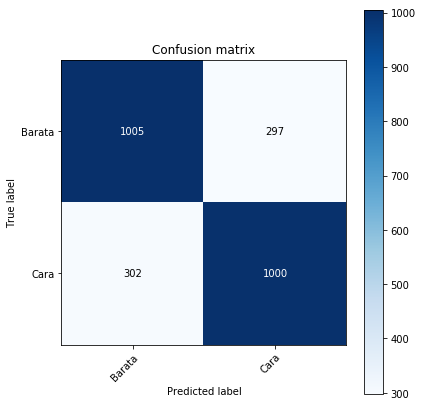

In [428]:
plot_confusion_matrix(None,None,classes=['Barata', 'Cara'],cms_bool = True,cms = np.array([[media['tn'], media['fp']],[media['fn'] ,media['tp']]]), title='Confusion matrix')

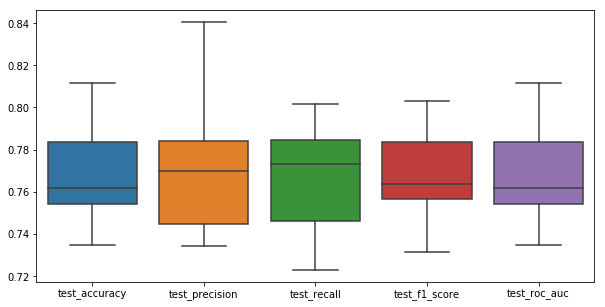

In [429]:

df_score = pd.DataFrame(scores)
df_score = df_score.drop(columns=["fit_time","score_time","test_tp","test_tn","test_fp","test_fn"])
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(data=df_score)


## SVM Não Linear

###### DATASET DE TREINO

In [430]:
from sklearn.svm import SVC
nome_modelo = "SVM RBF"
"""
parameters = {'gamma': ['auto','scale'], 'C': [0.001,0.01,0.1,1,10,100,1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
clf = GridSearchCV(SVC(), parameters, n_jobs=-1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19))
clf.fit(X_data_train, y_label_encoded_train)
print(clf.score(X_data_train, y_label_encoded_train))
print(clf.best_params_)
"""
svc = SVC(kernel='rbf',gamma='auto',C=1,probability=True,random_state=19)
scores = cross_validate(svc, X_data_train, y_label_encoded_train,cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19), scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.7891779213153259,
 'precisão': 0.8021453723352441,
 'recall': 0.7687668819729888,
 'f1_score': 0.7846196612331514,
 'roc_auc': 0.7891779213153259,
 'tp': 1001,
 'tn': 1054,
 'fp': 248,
 'fn': 301}

In [431]:
svc._get_coef

<bound method BaseSVC._get_coef of SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=19, shrinking=True,
  tol=0.001, verbose=False)>

<class 'numpy.ndarray'>
[[1054  248]
 [ 301 1001]]


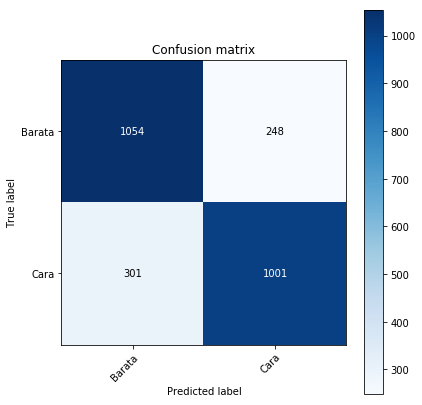

In [432]:
plot_confusion_matrix(None,None,classes=['Barata', 'Cara'],cms_bool = True,cms = np.array([[media['tn'], media['fp']],[media['fn'] ,media['tp']]]), title='Confusion matrix')

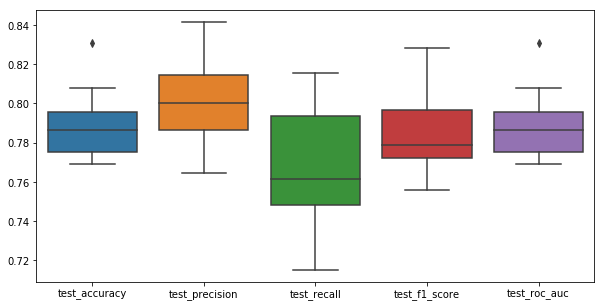

In [433]:
df_score = pd.DataFrame(scores)
df_score = df_score.drop(columns=["fit_time","score_time","test_tp","test_tn","test_fp","test_fn"])
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(data=df_score)

## Rede Neural MLP

###### DATASET DE TREINO

In [434]:
from sklearn.neural_network import MLPClassifier
nome_modelo = "Rede Neural MLP"
"""
parameters = {'solver': ['lbfgs'], 'max_iter': [2000], 'alpha': [0.001], 'hidden_layer_sizes':[(34,33,1),(40,33,1),(34,3,2,1),(6,6,6,6,6)], 'random_state':[0]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19))
clf.fit(X_data_train, y_label_encoded_train)
print(clf.score(X_data_train, y_label_encoded_train))
print(clf.best_params_)
"""
#33 deu melhor , fit_params = {'hidden_layer_sizes':[(6,6,6,6,6),'alpha':0.001,'max_iter':2000,'random_state':0,'activation':'logistic'}
mlp = MLPClassifier(hidden_layer_sizes=(6,6,6,6,6),alpha=0.001,max_iter=2000,random_state=0,activation='logistic')
scores = cross_validate(mlp, X_data_train, y_label_encoded_train,cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19), scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#scores
media,var = armazena_resultado(nome_modelo,scores)
media


{'acuracia': 0.7834145625366998,
 'precisão': 0.7936828617323086,
 'recall': 0.7672225484439225,
 'f1_score': 0.779590705400667,
 'roc_auc': 0.7834145625366998,
 'tp': 999,
 'tn': 1041,
 'fp': 261,
 'fn': 303}

<class 'numpy.ndarray'>
[[1041  261]
 [ 303  999]]


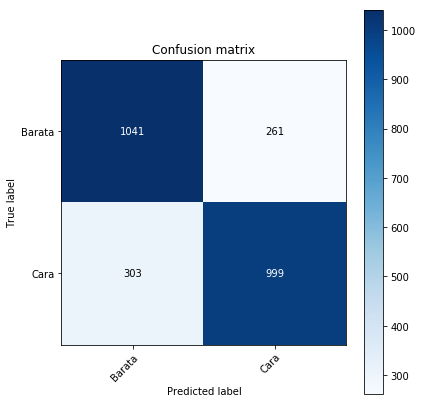

In [435]:
plot_confusion_matrix(None,None,classes=['Barata', 'Cara'],cms_bool = True,cms = np.array([[media['tn'], media['fp']],[media['fn'] ,media['tp']]]), title='Confusion matrix')

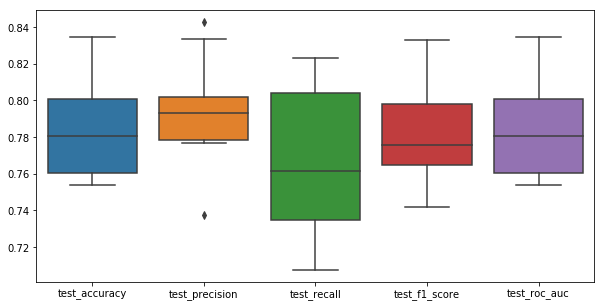

In [436]:
df_score = pd.DataFrame(scores)
df_score = df_score.drop(columns=["fit_time","score_time","test_tp","test_tn","test_fp","test_fn"])
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(data=df_score)

# LDA

In [437]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
nome_modelo = "LDA"
lda = LinearDiscriminantAnalysis()
scores = cross_validate(lda, X_data_train, y_label_encoded_train,cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19), scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#scores
media,var = armazena_resultado(nome_modelo,scores)
media


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("V

{'acuracia': 0.7841808573106281,
 'precisão': 0.7867720561209838,
 'recall': 0.7802935995302407,
 'f1_score': 0.7831765844929899,
 'roc_auc': 0.7841808573106281,
 'tp': 1016,
 'tn': 1026,
 'fp': 276,
 'fn': 286}

In [438]:
var

{'acuracia': 0.0003760899300705566,
 'precisão': 0.0004564889662416596,
 'recall': 0.000941869499749846,
 'f1_score': 0.00043806744880976105,
 'roc_auc': 0.0003760899300705562,
 'tp': -1,
 'tn': -1,
 'fp': -1,
 'fn': -1}

<class 'numpy.ndarray'>
[[1026  276]
 [ 286 1016]]


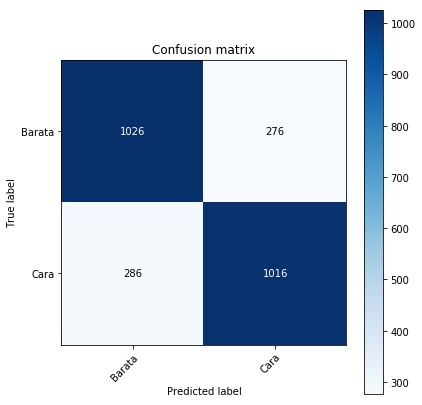

In [439]:
plot_confusion_matrix(None,None,classes=['Barata', 'Cara'],cms_bool = True,cms = np.array([[media['tn'], media['fp']],[media['fn'] ,media['tp']]]), title='Confusion matrix')
plt.savefig('lda_confusion_matrix.png')

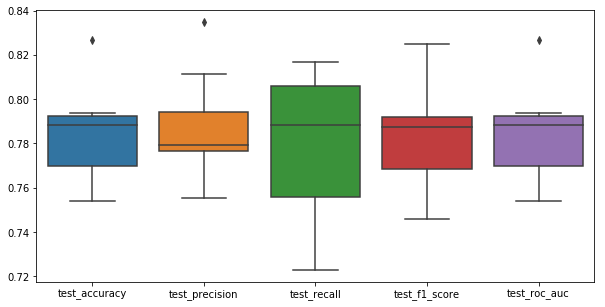

In [440]:
df_score = pd.DataFrame(scores)
df_score = df_score.drop(columns=["fit_time","score_time","test_tp","test_tn","test_fp","test_fn"])
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(data=df_score)
plt.savefig('lda_boxplot.png')

## QDA

In [441]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
nome_modelo = "QDA"
qda = QuadraticDiscriminantAnalysis()
scores = cross_validate(qda, X_data_train, y_label_encoded_train,cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19), scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#scores
media,var = armazena_resultado(nome_modelo,scores)
media


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables ar

{'acuracia': 0.5452466236054022,
 'precisão': 0.5299566921671136,
 'recall': 0.8956371109806225,
 'f1_score': 0.6623634219031391,
 'roc_auc': 0.5452466236054023,
 'tp': 1166,
 'tn': 254,
 'fp': 1048,
 'fn': 136}

In [442]:
var

{'acuracia': 0.0012069563693513127,
 'precisão': 0.0008479794148715242,
 'recall': 0.008661024808901702,
 'f1_score': 0.0004079963795905429,
 'roc_auc': 0.0012069563693513114,
 'tp': -1,
 'tn': -1,
 'fp': -1,
 'fn': -1}

<class 'numpy.ndarray'>
[[ 254 1048]
 [ 136 1166]]


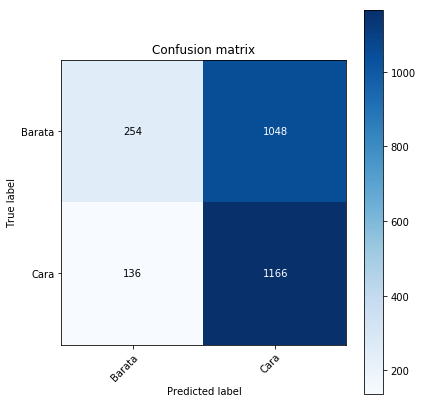

In [443]:
plot_confusion_matrix(None,None,classes=['Barata', 'Cara'],cms_bool = True,cms = np.array([[media['tn'], media['fp']],[media['fn'] ,media['tp']]]), title='Confusion matrix')
plt.savefig('qda_confusion_matrix.png')

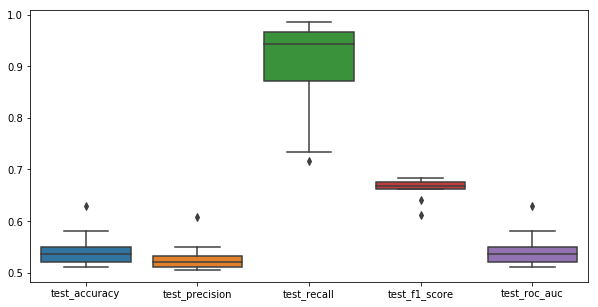

In [444]:
df_score = pd.DataFrame(scores)
df_score = df_score.drop(columns=["fit_time","score_time","test_tp","test_tn","test_fp","test_fn"])
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(data=df_score)
plt.savefig('qda_boxplot.png')

## Naive Bayes com PCA

In [445]:
nome_modelo = "Naive Bayes c/ ACP"
gnb = GaussianNB()
scores = cross_validate(gnb, X_PCA_train, y_label_encoded_train,cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=19), scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.6988872577803875,
 'precisão': 0.662352468957922,
 'recall': 0.8164298297122725,
 'f1_score': 0.730827506153785,
 'roc_auc': 0.6988872577803876,
 'tp': 1063,
 'tn': 757,
 'fp': 545,
 'fn': 239}

In [446]:
var

{'acuracia': 0.0007470872702622466,
 'precisão': 0.0008922440821350025,
 'recall': 0.0005835653913217982,
 'f1_score': 0.0003995669706485003,
 'roc_auc': 0.0007470872702622473,
 'tp': -1,
 'tn': -1,
 'fp': -1,
 'fn': -1}

<class 'numpy.ndarray'>
[[ 757  545]
 [ 239 1063]]


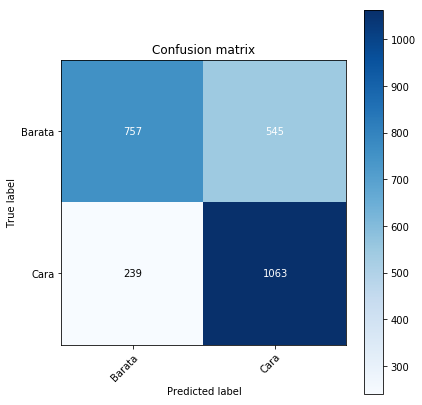

In [447]:
plot_confusion_matrix(None,None,classes=['Barata', 'Cara'],cms_bool = True,cms = np.array([[media['tn'], media['fp']],[media['fn'] ,media['tp']]]), title='Confusion matrix')
plt.savefig('naive_bayes_ACP_confusion_matrix.png')

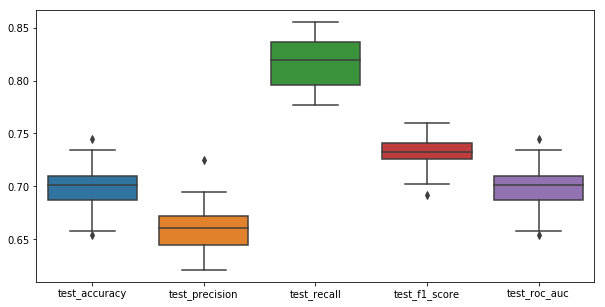

In [448]:
df_score = pd.DataFrame(scores)
df_score = df_score.drop(columns=["fit_time","score_time","test_tp","test_tn","test_fp","test_fn"])
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(data=df_score)
plt.savefig('naive_bayes_ACP_boxplot.png')

# Ensemble

In [449]:
from sklearn.ensemble import VotingClassifier
nome_modelo = "Ensemble"
clf = [rfc,svc, LR, gnb,rbfn_instance,mlp]
eclf = VotingClassifier(estimators=[('MLP',mlp),('Random Forests', rfc), ('Logistic Regression', LR), ('SVC', svc),('LDA',lda)], voting='soft')
scores = cross_validate(eclf, X_data_train, y_label_encoded_train,cv=10, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("V

{'acuracia': 0.7784497944803289,
 'precisão': 0.8081291266919743,
 'recall': 0.7660540223135642,
 'f1_score': 0.7717169183462049,
 'roc_auc': 0.7784497944803289,
 'tp': 997,
 'tn': 1030,
 'fp': 272,
 'fn': 305}

## Resultado das metricas utilizando Cross Validation de 10 ciclos com o Dataset de Treino e Teste

In [450]:
pd.set_option('float_format', '{:.5f}'.format)

In [451]:
resultado_metricas["treino"]

,Name,Logistic Regression,Logistic Regression Var,Naive Bayes,Naive Bayes Var,Random Forest,Random Forest Var,RBF,RBF Var,SVM RBF,...,Rede Neural MLP,Rede Neural MLP Var,LDA,LDA Var,QDA,QDA Var,Naive Bayes c/ ACP,Naive Bayes c/ ACP Var,Ensemble,Ensemble Var
0,acuracia,0.78417,0.00038,0.67546,0.00072,0.79071,0.00058,0.76996,0.00052,0.78918,...,0.78341,0.00061,0.78418,0.00038,0.54525,0.00121,0.69889,0.00075,0.77845,0.00161
1,precisão,0.78608,0.00049,0.61656,0.00112,0.80610,0.00081,0.77206,0.00096,0.80215,...,0.79368,0.00080,0.78677,0.00046,0.52996,0.00085,0.66235,0.00089,0.80813,0.00790
2,recall,0.78181,0.00120,0.94711,0.00246,0.76648,0.00096,0.76800,0.00063,0.76877,...,0.76722,0.00154,0.78029,0.00094,0.89564,0.00866,0.81643,0.00058,0.76605,0.01781
3,f1_score,0.78343,0.00046,0.74501,0.00016,0.78543,0.00062,0.76960,0.00046,0.78462,...,0.77959,0.00070,0.78318,0.00044,0.66236,0.00041,0.73083,0.00040,0.77172,0.00277
4,roc_auc,0.78417,0.00038,0.67546,0.00072,0.79071,0.00058,0.76996,0.00052,0.78918,...,0.78341,0.00061,0.78418,0.00038,0.54525,0.00121,0.69889,0.00075,0.77845,0.00161
5,tp,1018.00000,-1.00000,1233.00000,-1.00000,998.00000,-1.00000,1000.00000,-1.00000,1001.00000,...,999.00000,-1.00000,1016.00000,-1.00000,1166.00000,-1.00000,1063.00000,-1.00000,997.00000,-1.00000
6,tn,1024.00000,-1.00000,526.00000,-1.00000,1061.00000,-1.00000,1005.00000,-1.00000,1054.00000,...,1041.00000,-1.00000,1026.00000,-1.00000,254.00000,-1.00000,757.00000,-1.00000,1030.00000,-1.00000
7,fp,278.00000,-1.00000,776.00000,-1.00000,241.00000,-1.00000,297.00000,-1.00000,248.00000,...,261.00000,-1.00000,276.00000,-1.00000,1048.00000,-1.00000,545.00000,-1.00000,272.00000,-1.00000
8,fn,284.00000,-1.00000,69.00000,-1.00000,304.00000,-1.00000,302.00000,-1.00000,301.00000,...,303.00000,-1.00000,286.00000,-1.00000,136.00000,-1.00000,239.00000,-1.00000,305.00000,-1.00000


In [452]:
resultado_metricas["treino"].iloc [:, [0,1,3,5,7,9,11,13,15,17]]

,Name,Logistic Regression,Naive Bayes,Random Forest,RBF,SVM RBF,Rede Neural MLP,LDA,QDA,Naive Bayes c/ ACP
0,acuracia,0.78417,0.67546,0.79071,0.76996,0.78918,0.78341,0.78418,0.54525,0.69889
1,precisão,0.78608,0.61656,0.80610,0.77206,0.80215,0.79368,0.78677,0.52996,0.66235
2,recall,0.78181,0.94711,0.76648,0.76800,0.76877,0.76722,0.78029,0.89564,0.81643
3,f1_score,0.78343,0.74501,0.78543,0.76960,0.78462,0.77959,0.78318,0.66236,0.73083
4,roc_auc,0.78417,0.67546,0.79071,0.76996,0.78918,0.78341,0.78418,0.54525,0.69889
5,tp,1018.00000,1233.00000,998.00000,1000.00000,1001.00000,999.00000,1016.00000,1166.00000,1063.00000
6,tn,1024.00000,526.00000,1061.00000,1005.00000,1054.00000,1041.00000,1026.00000,254.00000,757.00000
7,fp,278.00000,776.00000,241.00000,297.00000,248.00000,261.00000,276.00000,1048.00000,545.00000
8,fn,284.00000,69.00000,304.00000,302.00000,301.00000,303.00000,286.00000,136.00000,239.00000


In [453]:
for i in scores_geral:
    if "fit_time" in scores_geral[i]:
        del(scores_geral[i]["fit_time"])
    if "score_time" in scores_geral[i]:
        del(scores_geral[i]["score_time"])

In [454]:
metricas = []
for metric in scores_geral['Logistic Regression']:
    metricas.append(metric)
#print(metricas)
count_metrica = 0
scores_boxplot = {}
for met in range(len(metricas)):
    dic_score = {}
    for modelo in scores_geral:
        dic_score[modelo] = scores_geral[modelo][metricas[count_metrica]]
    scores_boxplot[metricas[count_metrica]] = pd.DataFrame(dic_score)
    count_metrica+=1

In [455]:
#scores_boxplot['test_roc_auc']

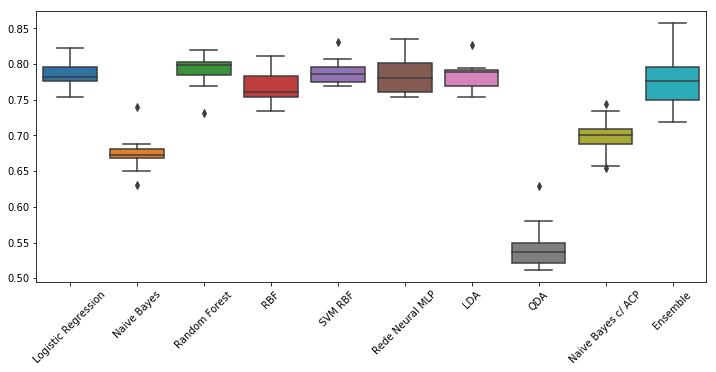

In [456]:
f, ax = plt.subplots(figsize=(12, 5))
fig = sns.boxplot(data=scores_boxplot['test_roc_auc'])
plt.xticks(rotation=45)
plt.savefig('models_roc_2.png')

In [457]:
print(np.mean(scores_boxplot['test_f1_score']['Logistic Regression']),  np.mean(scores_boxplot['test_f1_score']['Random Forest']),np.mean(scores_boxplot['test_f1_score']['Rede Neural MLP']), np.mean(scores_boxplot['test_f1_score']['LDA']),np.mean(scores_boxplot['test_f1_score']['Ensemble']))

0.7834342568181454 0.7854266842154303 0.779590705400667 0.7831765844929899 0.771716918346205


In [458]:
print(np.var(scores_boxplot['test_f1_score']['Logistic Regression']),  np.var(scores_boxplot['test_f1_score']['Random Forest']),np.var(scores_boxplot['test_f1_score']['Rede Neural MLP']), np.var(scores_boxplot['test_f1_score']['LDA']),np.var(scores_boxplot['test_f1_score']['Ensemble']))

0.0004550268333880318 0.0006235665673878427 0.0007043334987533808 0.00043806744880976094 0.0027741963113742897


In [459]:
print(np.var(scores_boxplot['test_roc_auc']['Random Forest']))

0.0005754794223450776


In [460]:
#plot_confusion_matrix(None,None,classes=['Barata', 'Cara'],cms_bool = True,cms = np.array([[30, 10],[50 ,10]]), title='Confusion matrix')

In [461]:
#accuracy_score(y_label_encoded_test, pred)

In [462]:
np.max(distances)

53.23168517085385

In [463]:
np.cumsum(pca.explained_variance_ratio_)

array([0.19946257, 0.30777687, 0.38007346, 0.44172799, 0.48666712,
       0.52646105, 0.56465013, 0.60153422, 0.63494145, 0.66757359,
       0.69924031, 0.73006224, 0.75920954, 0.78631571, 0.81250385,
       0.83583096, 0.856825  , 0.87563867, 0.8935058 , 0.91089753])

In [464]:
X_PCA_train.shape

(2604, 20)

In [465]:
pd.DataFrame(resultado_metricas['treino'])


,Name,Logistic Regression,Logistic Regression Var,Naive Bayes,Naive Bayes Var,Random Forest,Random Forest Var,RBF,RBF Var,SVM RBF,...,Rede Neural MLP,Rede Neural MLP Var,LDA,LDA Var,QDA,QDA Var,Naive Bayes c/ ACP,Naive Bayes c/ ACP Var,Ensemble,Ensemble Var
0,acuracia,0.78417,0.00038,0.67546,0.00072,0.79071,0.00058,0.76996,0.00052,0.78918,...,0.78341,0.00061,0.78418,0.00038,0.54525,0.00121,0.69889,0.00075,0.77845,0.00161
1,precisão,0.78608,0.00049,0.61656,0.00112,0.80610,0.00081,0.77206,0.00096,0.80215,...,0.79368,0.00080,0.78677,0.00046,0.52996,0.00085,0.66235,0.00089,0.80813,0.00790
2,recall,0.78181,0.00120,0.94711,0.00246,0.76648,0.00096,0.76800,0.00063,0.76877,...,0.76722,0.00154,0.78029,0.00094,0.89564,0.00866,0.81643,0.00058,0.76605,0.01781
3,f1_score,0.78343,0.00046,0.74501,0.00016,0.78543,0.00062,0.76960,0.00046,0.78462,...,0.77959,0.00070,0.78318,0.00044,0.66236,0.00041,0.73083,0.00040,0.77172,0.00277
4,roc_auc,0.78417,0.00038,0.67546,0.00072,0.79071,0.00058,0.76996,0.00052,0.78918,...,0.78341,0.00061,0.78418,0.00038,0.54525,0.00121,0.69889,0.00075,0.77845,0.00161
5,tp,1018.00000,-1.00000,1233.00000,-1.00000,998.00000,-1.00000,1000.00000,-1.00000,1001.00000,...,999.00000,-1.00000,1016.00000,-1.00000,1166.00000,-1.00000,1063.00000,-1.00000,997.00000,-1.00000
6,tn,1024.00000,-1.00000,526.00000,-1.00000,1061.00000,-1.00000,1005.00000,-1.00000,1054.00000,...,1041.00000,-1.00000,1026.00000,-1.00000,254.00000,-1.00000,757.00000,-1.00000,1030.00000,-1.00000
7,fp,278.00000,-1.00000,776.00000,-1.00000,241.00000,-1.00000,297.00000,-1.00000,248.00000,...,261.00000,-1.00000,276.00000,-1.00000,1048.00000,-1.00000,545.00000,-1.00000,272.00000,-1.00000
8,fn,284.00000,-1.00000,69.00000,-1.00000,304.00000,-1.00000,302.00000,-1.00000,301.00000,...,303.00000,-1.00000,286.00000,-1.00000,136.00000,-1.00000,239.00000,-1.00000,305.00000,-1.00000


In [466]:
print(len(y_label_encoded_train),len(X_data_train))

2604 2604


In [467]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_data_train,y_label_encoded_train)
eig_values,_ = np.linalg.eig(lda.covariance_)
k1 = np.max(eig_values)/np.min(eig_values)
print(np.max(eig_values),np.min(eig_values))
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_PCA_train,y_label_encoded_train)
eig_values,_ = np.linalg.eig(lda.covariance_)
print(np.max(eig_values),np.min(eig_values))
k2 = np.max(eig_values)/np.min(eig_values)
print(k1,k2)


3.662222252484434 1.85890758232256e-29
4.291950280668605 0.5377254337038586
1.9700937729829327e+29 7.98167617087703


/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [468]:
corrmat = data.corr()
retirar = list()
for i in range(len(corrmat["SalePrice"])):
    if abs(corrmat["SalePrice"][i]) < 0.2:
        retirar.append(data.columns[i])
print(len(corrmat["SalePrice"]))
print(len(retirar))
retirar

34
16


['MSSubClass',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

In [469]:
data_selecionados = data.drop(retirar,axis=1)
y = 'SalePrice'
feature_cols = [x for x in data_selecionados.columns if x != y]
X_data_selecionados_train = data[feature_cols]
y_data_selecionados_train = data[y]
distances = euclidean_distances(X_data_selecionados_train,X_data_selecionados_train)
m = list()
for i in range(len(distances[0])):
    m.append(np.sum(distances[i])/len(distances[0]))
X_data_selecionados_train['mean_dist'] = m
m_sorted = sorted(m)
outliers = m_sorted[-round(0.1*len(m)):-1]
X_data_selecionados_train['SalePrice'] = y_data_selecionados_train
X_data_selecionados_train = X_data_selecionados_train[X_data_selecionados_train.mean_dist < outliers[0]]
y_data_selecionados_train = X_data_selecionados_train['SalePrice']
X_data_selecionados_train = X_data_selecionados_train[feature_cols]

/home/felipe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/felipe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


PCA 0.7727124532176409 0.002672052832087347
Selecionados 0.7693379339421911 0.001915808847680033
RAW 0.7718621667199799 0.0019823311548318795


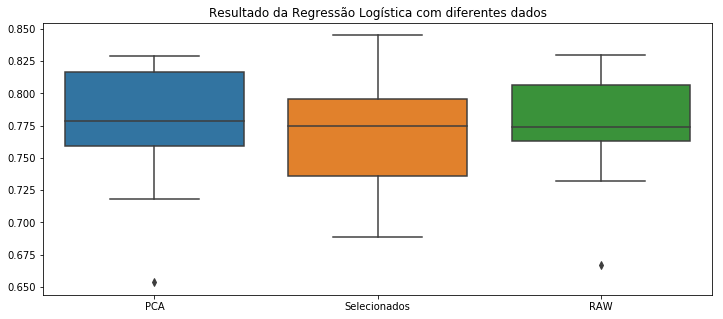

In [470]:
X_labels = ['PCA','Selecionados','RAW']
X_train_datas = [X_PCA_train,X_data_selecionados_train,X_data_train]
modelo = LR
compare_dataset = dict()
for i in range(0,len(X_train_datas)):
    compare_dataset[X_labels[i]] = cross_validate(modelo, X_train_datas[i], y_label_encoded_train,cv=10, scoring=scoring,return_train_score=False)['test_f1_score']
    print(X_labels[i],np.mean(compare_dataset[X_labels[i]]),np.var(compare_dataset[X_labels[i]]))
cp_df = pd.DataFrame(compare_dataset)
f, ax = plt.subplots(figsize=(12, 5))
fig = sns.boxplot(data=cp_df)
plt.title('Resultado da Regressão Logística com diferentes dados')
plt.savefig('LR_comparison.png')
plt.show()

In [471]:
di = cross_validate(modelo, X_train_datas[i], y_label_encoded_train,cv=10, scoring=scoring,return_train_score=False)
di.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'test_roc_auc', 'test_tp', 'test_tn', 'test_fp', 'test_fn'])

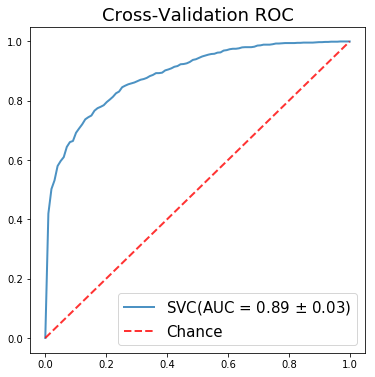

In [472]:
from sklearn.metrics import roc_curve, roc_auc_score ,auc
from scipy import interp
cv = StratifiedKFold(n_splits=10,random_state=19)
#classifiers = [lda,rfc,eclf,svc,mlp,gnb,qda,LR]
classifiers = [svc]
plt.figure(figsize=(6,6))
count = 1
for classifier in classifiers:
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    i = 0
    for train, test in cv.split(X_data_train, y_label_encoded_train):
        classifier.fit(X_data_train.iloc[train], y_label_encoded_train.iloc[train])
        probas_ = classifier.predict_proba(X_data_train.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_label_encoded_train[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    p = plt.plot(mean_fpr, mean_tpr,
             label=type(classifier).__name__ + r'(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    #if(count == 1):
    #    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color=p[-1].get_color(), alpha=.2, label=r'$\pm$ 1 std. dev.')
    #else:    
    #    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color=p[-1].get_color(), alpha=.2)
    #count += 1    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.legend(loc="lower right", prop={'size': 15})
plt.title('Cross-Validation ROC',fontsize=18)
plt.savefig('Cross-Validation-ROC_mean.png')
plt.show()